# E-commerce - Выявление профилей потребления

В распоряжении транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».\
Данный проект поможет магазину стать лучше, а клиентам - обустроить дом своей мечты.\
«Пока все ещё тут» - мы создаем уют.

**Цель исследования**: Выявление профилей пользователей, их сегментация и анализ
    
**Ход исследования**:\
1.Загрузка датасета и изучение его общей информации

2.Предобработка данных
- Проверка дубликатов
- Проверка пропусков
- Приведение типов данных к нужному формату
- Подсчет количества значений в столбцах
- Добавление необходимых столбцов
3.Исследовательский анализ данных
- Среднее количество покупок на пользователя
- Средняя выручка на пользователя
- Среднее количество товаров в заказе
- Количество заказов в месяц
- Выручка по месяцам
- Топ-5 дорогих товаров
4.Сегментация пользователей
- Категоризация товаров 
- Выручка по категориям по месяцам
- Количество заказов по категориям по месяцам
- Кластеризация пользователей (RFM) - по давности совершения покупки, частоте покупок и кол-во потраченных денег
5.Формулирование и проверка статистических гипотез
- H0: Различий в количестве товаров в заказе между кластерами нет
- H1: Различия в количестве товаров в заказе между кластерами есть

- H0: Различий в выручке между кластерами нет
- H1: Различий в выручке между кластерами есть
6.Выводы и рекомендации (+презентация и дашборд)

Подробное описание действий каждого хода находится в самом проекте.

**Структура данных ecom_dataset_upd.csv**:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Загрузка датасета и изучение его общей информации

In [1]:
import pandas as pd               #загрузка библиотек
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import numpy as np

import warnings

from scipy.stats import mannwhitneyu

In [2]:
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}")

In [3]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [5]:
data['date'] = pd.to_datetime(data['date'],format='%Y%m%d%H%M')

In [6]:
print(data['date'].min())
print(data['date'].max())

2018-10-01 00:00:00
2020-01-31 01:05:00


**Вывод:** На данном этапе был загружен датасет, в котором 6 столбцов и 7474 строк. Названия колонок соответствуют верному стилю.\
Данные за период с 1 октября 2018г до 31 января 2020г.

## Предобработка данных

### Проверка пропусков

In [7]:
print('Количество пропусков:')
data.isna().sum()

Количество пропусков:


date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

### Подсчет уникальных значений в столбцах

In [8]:
print('Количество уникальных значений:')
data.nunique()

Количество уникальных значений:


date           3126
customer_id    2451
order_id       2784
product        2343
quantity         49
price           407
dtype: int64

In [9]:
data['product'] = data['product'].str.lower()  #приведем названия товаров к нижнему регистру

### Проверка дубликатов

In [10]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


In [11]:
#посмотрим на дубликаты в столбцах айди клиента, заказа и наименование товара
data[data[['customer_id', 'order_id', 'product']].duplicated() == True].head() 

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 01:08:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
59,2018-10-02 01:09:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
60,2018-10-02 02:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
63,2018-10-03 00:04:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
94,2018-10-04 01:03:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409.0


In [12]:
data = data.drop_duplicates(         #перезапишем датасет, удалив дубликаты и оставив последнее значение
    subset=['customer_id', 'order_id', 'product'], keep='last') 

In [13]:
#проверка на наличие >1 айди клиента на 1 айди заказа
multi = data.groupby('order_id')['customer_id'].nunique().reset_index().query('customer_id > 1')['order_id'].tolist()
data = data[~data['order_id'].isin(multi)]

In [14]:
#размер данных после удаления дубликатов
data.shape

(5495, 6)

### Добавление необходимых столбцов

In [15]:
data['month'] = data['date'].astype('datetime64[M]')  #добавим столбец с месяцем

In [16]:
data['revenue'] = data['price'] * data['quantity']  #добавим столбец с выручкой 

In [17]:
data.describe()

,order_id,quantity,price,revenue
count,5495.000000,5495.000000,5495.000000,5495.000000
mean,50885.363239,2.574522,530.538232,824.689824
std,26682.649181,16.546892,975.345035,9244.249564
min,12624.000000,1.000000,9.000000,9.000000
25%,14804.000000,1.000000,90.000000,120.000000
50%,69090.000000,1.000000,150.000000,190.000000
75%,71029.500000,1.000000,524.000000,727.000000
max,73164.000000,1000.000000,14917.000000,675000.000000


**Вывод:** Пропуски отсутствуют. Были неявные дубликаты с одинаковым айди клиента,заказа и наименованием товара, а также дубликаты,в которых на 1 айди заказа приходилось больше 1 айди клиента. \
После их удаления осталось 5495 строк.\
Столбец с датой был приведен к нужному типу, также добавлен столбец с месяцем и выручкой.\
По медиане кол-во товара равно 1, цена - 150 руб.,а выручка 190 руб.

## Исследовательский анализ данных

In [18]:
print('Минимальная дата',data['date'].min())
print('Максимальная дата',data['date'].max())

Минимальная дата 2018-10-01 00:00:00
Максимальная дата 2020-01-31 01:05:00


### Среднее количество заказов на пользователя

In [19]:
#сгруппируем кол-во уникальных заказов по пользователям
orders = data.groupby('customer_id').agg({'order_id':'nunique'}).sort_values(by='order_id',ascending=False) 

In [20]:
orders.describe()

,order_id
count,2394.000000
mean,1.150794
std,2.686314
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,126.000000


В среднем 1 пользователь совершает 1,15 заказов, но по медиане 1 заказ.\
Самое большое кол-во заказов, которое совершил пользователь - 126.

In [21]:
print(np.percentile(orders['order_id'], [95, 99]))   #посчитаем 95 и 99 перцентели кол-ва заказов

[2. 3.]


Не более 5% пользователей совершали 2 заказа и не более 1% - 3 заказа

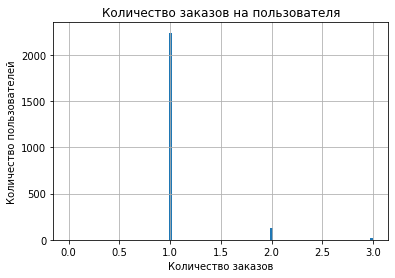

In [22]:
#построим гистограмму без аномальных значений
orders.hist(bins=100,range=(0,3))
plt.title('Количество заказов на пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

По гистограмме видно насколько мало пользователей делают больше 1 заказа.

### Средняя выручка на пользователя

In [23]:
#сгруппируем суммарную выручку по пользователям
revenue = data.groupby('customer_id').agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False)

In [24]:
revenue.describe()

,revenue
count,2394.000000
mean,1892.928397
std,14431.356343
min,15.000000
25%,397.000000
50%,830.500000
75%,1793.250000
max,675000.000000


В среднем выручка с одного пользователя составляет 1892 рубля, но медианное значение намного меньше - 830 рублей. \
Это связано с некоторыми аномальными заказами, один из которых на 675 тыс. руб.

In [25]:
print(np.percentile(revenue['revenue'], [95, 99]))  #посчитаем 95 и 99 перцентели выручки

[4784.8  9932.71]


Не более 5% пользователей за все время заказали на 4785 руб. и не более 1% - на 9933 руб.

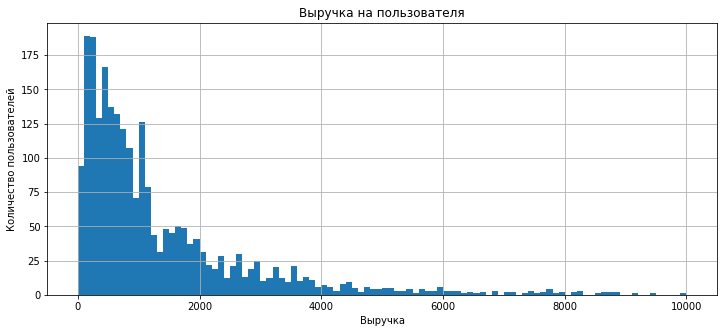

In [26]:
#гистограмма без аномальных значений
revenue.hist(figsize=(12, 5),bins=100,range=(0,10000))
plt.title('Выручка на пользователя')
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей');

На графике видно, что наибольшее кол-во пользователей приносят магазину до 1000 рублей.

### Среднее количество товаров в заказе

In [27]:
#сгруппируем суммарное кол-во товаров по заказам
quantity = data.groupby('order_id').agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False)

In [28]:
quantity.describe()

,quantity
count,2755.000000
mean,5.135027
std,23.941148
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,1000.000000


Ситуация такая же как и с кол-вом заказов, в связи с несколькими заказами с большим кол-вом товаров, средняя и медиана сильно отличаются.\
В среднем в заказе 5 товаров, а по медиане 2.

In [29]:
print(np.percentile(quantity['quantity'], [95, 99]))  #посчитаем 95 и 99 перцентели кол-ва товаров в заказе

[17. 50.]


Не более 5% заказов содержат 17 товаров и не более 1% - 50 товаров

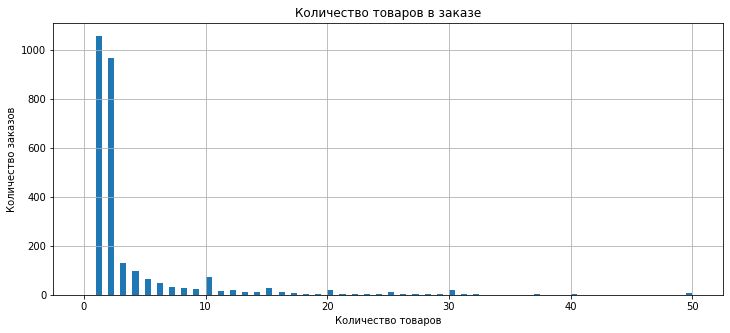

In [30]:
quantity.hist(figsize=(12, 5),bins=100,range=(0,50))
plt.title('Количество товаров в заказе')
plt.xlabel('Количество товаров')
plt.ylabel('Количество заказов');

На гистограмме видно, что чаще всего в одном заказе находятся 1 позиция, нежели две.

### Количество заказов в месяц

In [31]:
#сгруппируем кол-во уникальных заказов по месяцам
month = data.groupby('month').agg({'order_id':'nunique'})

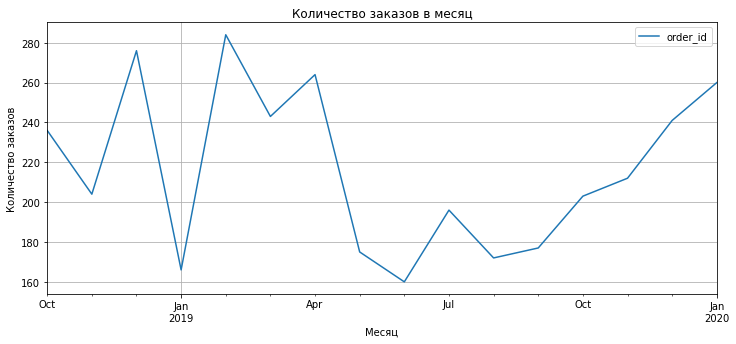

In [32]:
month.plot(figsize=(12, 5),grid=True)
plt.title('Количество заказов в месяц')
plt.ylabel('Количество заказов')
plt.xlabel('Месяц');

К концу 2019г. видно как сильно просело кол-во заказов по сравнению с декабрем и находилось на уровне 170 заказов за месяц.\
Затем резкий рост до февраля включительно с более 280 заказами за месяц.\
С августа 2020г. кол-во заказов постепенно растет.

### Выручка по месяцам

In [33]:
#сгруппируем суммарную выручку по месяцам
revenue_month = data.groupby('month').agg({'revenue':'sum'})

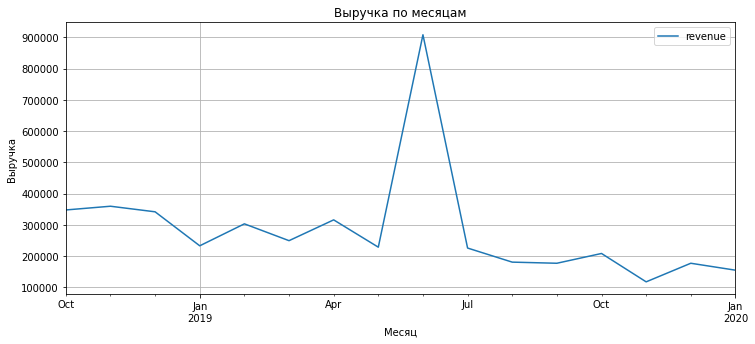

In [34]:
revenue_month.plot(figsize=(12, 5),grid=True)
plt.title('Выручка по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяц');

В июне виден резкий скачок выручки за месяц, достигающий 900 тыс. руб. В остальные месяцы выручка не более 350 тыс.

In [35]:
#посмотрим на самые дорогие заказы и в каком месяце они были
data.groupby(['order_id','month']).agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False).head()

,,revenue
order_id,month,
71743,2019-06-01,675000.0
71668,2019-06-01,49432.0
69830,2019-01-01,47385.0
69156,2018-11-01,33680.0
69504,2018-12-01,32718.0


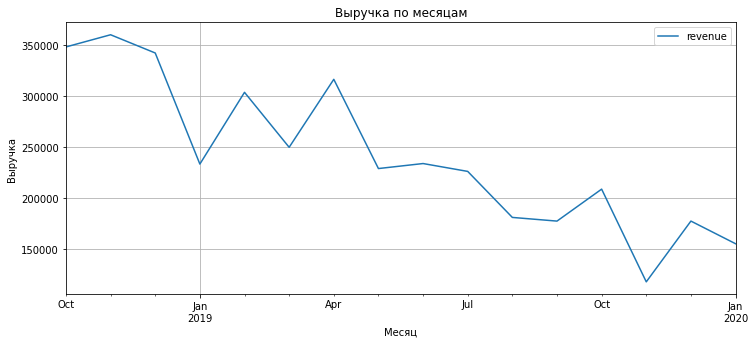

In [36]:
#построим график без аномального заказа
data1 = data[data['order_id'] != 71743]
rev_new = data1.groupby('month').agg({'revenue':'sum'})

rev_new.plot(figsize=(12, 5),grid=True)
plt.title('Выручка по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяц');

На этом графике картина яснее, так как не был взят в расчет один заказ в июне на 675 тыс. руб., поскольку это единичный случай за все время и он искажает данные.\
Теперь тенденция к снижению выручки более заметна, в октябре 2019г она была в районе 350 тыс. руб, а в начале 2020г. уже в районе 150 тыс. руб.

### Топ-5 дорогих товаров

In [37]:
data[['product','price']].sort_values(by='price',ascending=False).head()  #товар и его цена по убыванию цены

,product,price
5992,сушилка уличная leifheit 85210 linomatic v 400...,14917.0
2697,сумка-тележка хозяйственная andersen royal sho...,8737.0
1981,сумка-тележка хозяйственная andersen alu star ...,8437.0
2997,сумка-тележка хозяйственная rolser mnb019 rojo...,8077.0
7436,сумка-тележка хозяйственная rolser mnb019 rojo...,8077.0


Самым дорогим товаром является уличная сушилка с ценой 14917 руб. Затем идут сумки-тележки с ценой около 8 тыс. руб.

**Вывод:** Чаще всего пользователь совершает 1 заказ, только 5% сделали 2 заказа.\
Медианная выручка с клиента составляет 830 рублей.\
Медианное количество товаров в заказе - 2 и заказов с одной позициями больше, чем с двумя.\
К концу 2019 года произошло резкое падение кол-ва заказов за месяц(170шт), затем рост до 280 заказов за месяц и снова падение до июня. Однако с августа 2020 года наблюдается тенденция к постоянному росту кол-ва заказов.

## Сегментация пользователей

### Категоризация товаров

In [38]:
#список уникальных товаров
prod = data['product'].unique()

for i in prod:
    print(i)

комнатное растение в горшке алое вера, d12, h30
комнатное растение в горшке кофе арабика, d12, h25
радермахера d-12 см h-20 см
хризолидокарпус лутесценс d-9 см
циперус зумула d-12 см h-25 см
шеффлера лузеана d-9 см
юкка нитчатая d-12 см h-25-35 см
настенная сушилка для белья gimi brio super 100
таз пластмассовый 21,0 л круглый "водолей" с614, 1404056
чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379
вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, attribute, ahs331
сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м
чехол eurogold clean basic хлопок для досок 120х38-120х42 см c42
крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027
корзина мягкая пластиковая 17 л, м-пластика, m2880
чехол для гладильной доски festival 137x60 см из хлопка 4738
сумка-тележка 2-х колесная gimi argo синяя
многолетнее растение тимьян-чабрец розовый объем 0,5 л
рассада зелени для кухни базилик тонус, кассета по 6шт
рассад

In [39]:
bathroom = ['доска', 'гладильн', 'ванн', 'влаговпитывающий', 'туалета', 'таз', 'щетка', 
            'ведр', 'насадка', 'ополаскиватель', 'антинакипин', 'ароматизирован', 'прищепки','веник','гель',
            'прищепок','губка','защитная','соль','кондиционер','контейнер','стирки', 'мытья','швабре', 'настенная', 'пена',
            'перчатки','швабр','совок','глажен','налет','антижир','пылесос','крем', 'сушилк','подрукавник','совком', 
            'для чистки','мыть', 'средство', 'мойк', 'утюг', 'покрытие', 'тряпка','корзина', 'корыто',  
            'вантуз', 'сменный','дозатор', 'сметка', 'скребок', 'окномойка','чистящий','чистки', 'ерш','отбеливатель',
            'стиральный', 'держатель', 'запасная', 'коврик', 'ковш', 'мыльница', 'подголовник', 'пробка','унитаза', 
            'зубная','мыло','жидкое','мыло-скраб','увлажняющая', 'маска', 'фен дорожный', 'тряпкодержатель', 'полотенце',
            'махровых салфеток', 'нетканые салфетки', 'полотенец', 'ткань универсальная', 'ёрш']

dacha = ['автополив', 'аквилегия', 'алиссум', 'анемон', 'антуриум', 'арбуз', 'астра', 'бадан', 'бакоп', 'барвинок', 'бегония',
         'бензин', 'бузульник', 'веник', 'вербейник', 'вербена', 'веревка', 'виола', 'г', 'гайлардий', 'гвоздик', 'георгин',
         'гипсофил', 'гортензия', 'девичий', 'дендробиум', 'дыня', 'ель', 'зола', 'календула', 'калибрахоа', 'камнеломка',
         'кассета', 'кашпо', 'кипарисовик', 'клен', 'клубника', 'колокольчик', 'колосковый', 'кореопсис', 'корыто', 'косметь',
         'котовник', 'лапчатка', 'лен', 'лилейник', 'лобелия', 'многолетний', 'монарда', 'мусор', 'мусорный', 'настурция',
         'нивянник', 'осина', 'папоротник', 'пеларгония', 'петуния', 'пикник', 'пиретрум', 'платикодон', 'почтовый',
         'пьезозажигалка', 'ранункулус', 'рассада', 'роза', 'рудбекия', 'садовый', 'седум', 'солидаго', 'сумка-тележка',
         'тележка', 'томат', 'тюльпан', 'уличный', 'урна', 'урна-пепельница', 'фал', 'физостегия', 'флокс', 'фуксия', 'хоста',
         'хозяйственный', 'хризантема', 'цинния', 'черенок', 'шнур', 'шпагат', 'щетка-сметка', 'энотера', 'эхинацея', 'ясколка','рассада', 'томат', 'сумка', 'помидор', 'роза', 
         'раннеспелый', 'капуста', 'герань', 'огурец', 'мята', 'фуксия', 'примула', 'цикламен', 'цинния', 'калатея', 'мимоза стыдливая',
         'афеляндр', 'диффенбахий', 'диффенбахия', 'эхинокактус', 'лилейник высокорослый', 'гиацинт', 'фатсия', 'каллуна', 'капсикум', 
         'соланум', 'подсолнечник', 'аптения', 'кодонант', 'смолевка', 'вербейник', 'эхинацея', 'платикодон', 'энотера', 'цитрофортунелла', 
         'синнингия', 'пиретрум', 'гайлардия', 'нивянник', 'вигна', 'настурция', 'адиантум', 'азалия']

bedroom = ['муляж', 'искусственный', 'штора', 'штор', 'подушка','покрывало',
            'белье', 'искусственная', 'декоративная', 'новогоднее', 'подарочный', 'ваза','фоторамка',
            'комнатное растение', 'двуспальное','постельное', 'ковер', 'кольца', 'махровое','халат', 'ковров', 
            'наволочка', 'наматрасник', 'одеяло', 'плед', 'подкладка', 'чехол','простыня', 'простынь', 'наматрацник',
            'пододеяльник','придверный', 'вешалка', 'вешалок', 'одежда', 'крючок',
            'весы', 'вешалки','вкладыши','короб','коробка','кофр','лоток','плечики','полки','решетка','складная', 
            'подставка','карниз','светиль','фото']

kitchen = ['антижир','кухн', 'тарелка', 'нож', 'салатник', 'чайник', 'банка', 'салфетка', 'рыбочистка',
            'термостакан', 'котел', 'салфетница', 'рассекатель', 'дуршлаг', 'бульонница', 'скалка', 'тортница', 
            'сотейник', 'отделитель', 'сахарница', 'половник', 'бидон','блюдо','блюдце','вилка','разделочная',
            'емкость','жестяная','измельчитель', 'картофелемялка','кастрюля','кипятильник','кисточка','хлебница',
            'кружка', 'крышка', 'кувшин', 'кухонн','столов','чайная','холодца','мантоварка',
            'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
            'бокалов','для пикника', 'фужер','овощеварка','овощечистка', 'просеиватель','противень','сковорода',
            'скребок','соковарка','соковыжималка', 'стеклянн', 'терка', 'термокружка','толкушка',
            'фал капроновый','форма','ложка','электроштопор','сито', 'подставка для яйца', 'орехоколка',
            'кухонных полотенец', 'чайный', 'кексов', 'пресс', 'кофе', 'круж', 'термос',
            'венчик', 'набор посуды','скатерть', 'урна']

repair = ['болт', 'вентиляционный', 'инструмент', 'карниз', 'комод', 'крепеж', 'лестниц', 'линейка,',
             'мебельный', 'напильник', 'обувниц', 'петля', 'подставка', 'полк','пробка',
             'сверло', 'стеллаж', 'стремянка', 'строительный',
             'угол', 'фиксатор', 'форточный', 'шпингалет', 'штангенциркуль', 'этажерка','стремянка', 'веревк', 
             'инструмент','сверл','напильник','стяжк','сварка',
             'пружин', 'паста для полировки', 'бензин','лестница','лопатка','шнур',
            'многофункциональный','пьезозажигалка', 'ручка','седум','сетка','сметка','термометр',
            'уголок','шило','шпагат', 'основание для пробки','тележ','ящик','стеллаж','этажерка','комод','пуф','обувн']
            

In [40]:
#функция для категоризации товаров
def categories(prod):
    for good in bathroom:
        if good in prod:
            return 'Товары для ванной'
    for good in dacha:
        if good in prod:
            return 'Товары для сада'
    for good in bedroom:
        if good in prod:
            return 'Товары для спальни и гостиной'
    for good in kitchen:
        if good in prod:
            return 'Товары для кухни'
    for good in repair:
        if good in prod:
            return 'Товары для ремонта'
    return 'Другие'

In [41]:
data['category'] = data['product'].apply(categories)

In [42]:
data['category'].value_counts()

Товары для сада                  3288
Товары для ванной                1277
Товары для спальни и гостиной     378
Товары для кухни                  290
Другие                            185
Товары для ремонта                 77
Name: category, dtype: int64

Разделили товары на следующие категории: Товары для ванной, Товары для сада, Товары для спальни и гостиной, Товары для кухни и Товары для ремонта.\
Больше всего в магазине представлено товаров для сада, более 3200 позиций. Меньше всего товаров для ремонта - 77.

### Выручка по категориям по месяцам

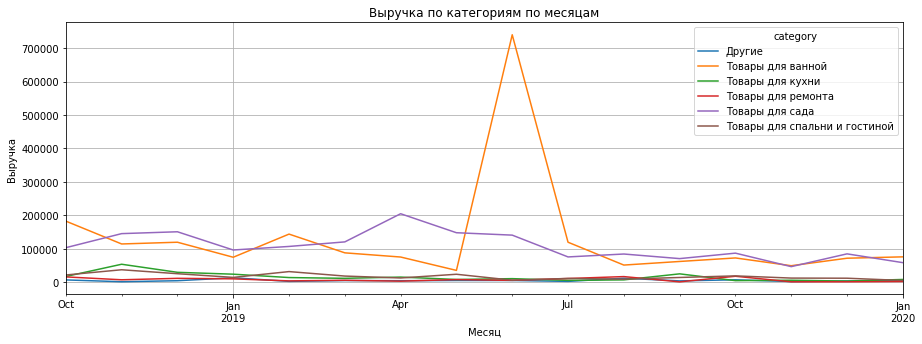

In [43]:
data.pivot_table(           #сводная таблица
    index='month', 
    columns='category',  
    values='revenue',  
    aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('Выручка по категориям по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

На графике видно влияние того дорогого заказа в июне.\
В целом, товары для сада и товары для ванной приносят магазину больше выручки, чем другие категории - в месяц от 80 до 200 тыс. руб.

### Количество заказов по категориям по месяцам

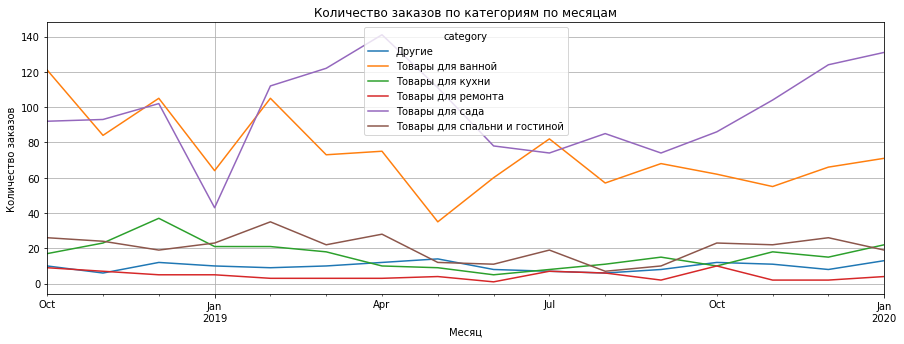

In [44]:
data.pivot_table(         #сводная таблица
    index='month', 
    columns='category',  
    values='order_id',  
    aggfunc='nunique').plot(figsize=(15, 5), grid=True)
plt.title('Количество заказов по категориям по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

Товары для сада и товары для ванной приносят намного больше заказов каждый месяц - до 140, товары других категорий заказывают не больше 40 раз за месяц.\
Пик заказов товаров для сада приходится на весну в связи с началом дачного сезона.

### Кластеризация пользователей (RFM)

Recency - давность совершения покупки в днях\
Frequency - частота совершения покупок\
Monetary - кол-во потраченных денег

Столбец R принимает значения от 1 до 4(где 1 - покупка была совершена недавно,4 - очень давно)\
Столбец F принимает значения от 1 до 2 в связи с идентичностью кол-ва заказов у клиентов(где 1 - до 2 заказов включительно, 2 - больше 2)\
Столбец M принимает значения от 1 до 4(где 1 - клиент потратил мало ден. средств ,4 - много)

In [45]:
#Объявим переменную с последней датой из датасета
today = pd.to_datetime(data['date']).max().date()

# Рассчитываем Recency
recency = data.groupby('customer_id')['date'].max().reset_index()
recency.columns = ['customer_id', 'last_purchase_date']
recency['recency_days'] = (today - pd.to_datetime(recency['last_purchase_date']).dt.date).dt.days

# Рассчитываем Frequency
frequency = data.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Рассчитываем Monetary Value
monetary = data.groupby('customer_id')['revenue'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Объединяем RFM-метрики в одну таблицу
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

rfm['R'] = pd.qcut(rfm['recency_days'], q=4, labels=False, duplicates='drop') + 1
rfm['F'] = pd.qcut(rfm['frequency'], q=4, labels=False, duplicates='drop') + 1
rfm['M'] = pd.qcut(rfm['monetary'], q=4, labels=False, duplicates='drop') + 1


# Объединяем RFM-метрики в один столбец
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

rfm['category'] = data['category']
display(rfm.head())

,customer_id,last_purchase_date,recency_days,frequency,monetary,R,F,M,RFM,category
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 00:08:00,107,4,555.0,2,2,2,222,Товары для сада
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 01:01:00,349,1,442.0,4,1,2,412,Товары для сада
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 02:03:00,109,1,914.0,2,1,3,213,Другие
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 01:07:00,369,1,1649.0,4,1,3,413,Другие
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 01:07:00,124,1,2324.0,2,1,4,214,Другие


In [46]:
data = rfm.merge(data, on='customer_id', how='left')  #соединим данные по айди клиента

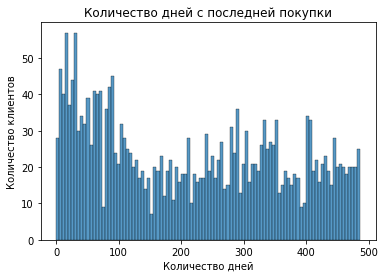

In [47]:
sns.histplot(data=rfm, x='recency_days', bins=100)  #гистограмма с кол-вом дней с последней покупки
plt.title('Количество дней с последней покупки')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество дней');         

Больше всего клиентов, у которых с последнего заказа прошло не более 100 дней

### График выручки по давности совершения покупки

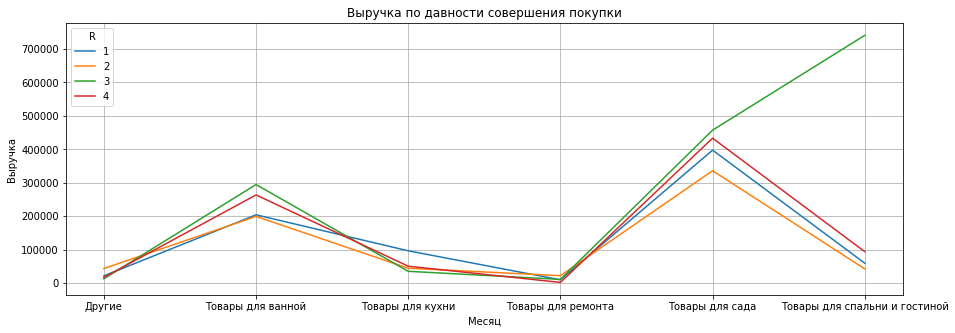

In [48]:
rfm.pivot_table(         
    index='category', 
    columns='R',  
    values='monetary',  
    aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('Выручка по давности совершения покупки')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

Сегменты клиентов отличаются между собой в разрезе выручки. Только 3ий принес больше выручки в категории товаров для спальни и гостиной.

### График выручки по частоте совершения покупок

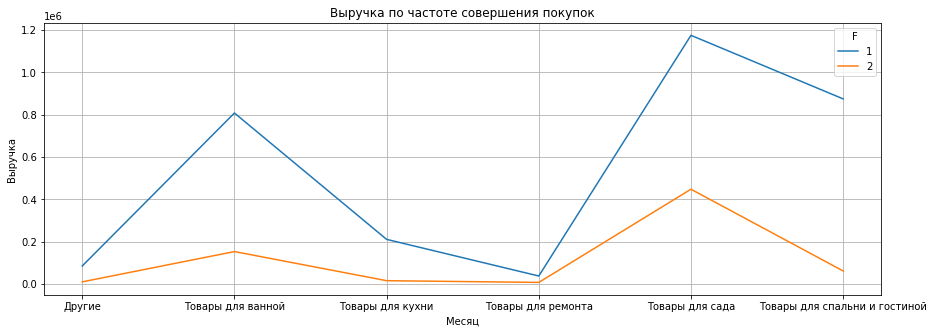

In [49]:
rfm.pivot_table(         
    index='category', 
    columns='F',  
    values='monetary',  
    aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('Выручка по частоте совершения покупок')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

Клиенты из 1ого сегмента (совершившие до 2 заказов включительно) приносят в 4 раза больше выручки, чем из 2ого (совершившие больше 2 заказов).Это связано с тем, что таких клиентов просто намного больше.

### График выручки по кол-ву потраченных средств

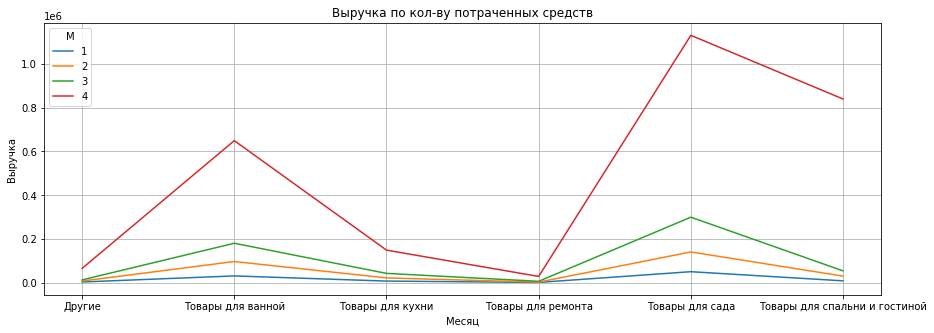

In [50]:
rfm.pivot_table(         
    index='category', 
    columns='M',  
    values='monetary',  
    aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('Выручка по кол-ву потраченных средств')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

Пользователи из 4го сегмента выделяются на графике тем, что принесли больше выручки по всем категориям.

### Распределение кластеров по категориям

In [51]:
rfm['RFM'].unique()

array(['222', '412', '213', '413', '214', '111', '113', '212', '324',
       '114', '322', '424', '311', '423', '211', '314', '112', '312',
       '323', '411', '414', '313', '221', '223', '224', '421', '321',
       '422'], dtype=object)

In [52]:
# Создаем список условий и список соответствующих им категорий
conditions = [
    (rfm['RFM'].astype(int) == 424),
    (rfm['RFM'].astype(int) >= 224) & (rfm['RFM'].astype(int) < 424),
    (rfm['RFM'].astype(int) == 111),
    (rfm['RFM'].astype(int) < 244)
]
categories = ['Активные', 'На пороге оттока', 'Потерянные', 'Новые']

# Используем np.select для создания нового столбца с категориями
rfm['category'] = np.select(conditions, categories)

# Выводим полученную таблицу
display(rfm.head())

,customer_id,last_purchase_date,recency_days,frequency,monetary,R,F,M,RFM,category
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 00:08:00,107,4,555.0,2,2,2,222,Новые
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 01:01:00,349,1,442.0,4,1,2,412,На пороге оттока
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 02:03:00,109,1,914.0,2,1,3,213,Новые
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 01:07:00,369,1,1649.0,4,1,3,413,На пороге оттока
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 01:07:00,124,1,2324.0,2,1,4,214,Новые


In [53]:
rfm['category'].value_counts() #подсчет значений каждой категории

На пороге оттока    1172
Новые               1086
Потерянные           107
Активные              29
Name: category, dtype: int64

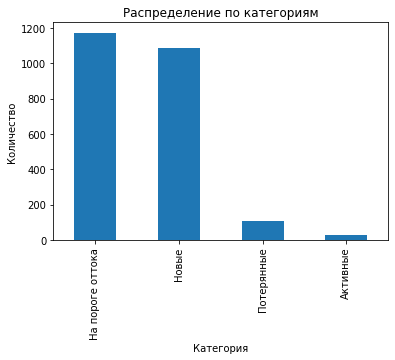

In [54]:
rfm['category'].value_counts().plot(kind='bar')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Распределение по категориям')
plt.show()


Клиентов на пороге оттока больше всего, немного уступают новые клиенты. А меньше всего активных клиентов (в 40 раз < на грани оттока).

### Сезонность категорий

In [55]:
#соединим данные с необходимыми столбцами 
rfm = rfm.merge(data[['customer_id','order_id','quantity','revenue','category_x']], on='customer_id', how='left')  
rfm['month'] = rfm['last_purchase_date'].astype('datetime64[M]')

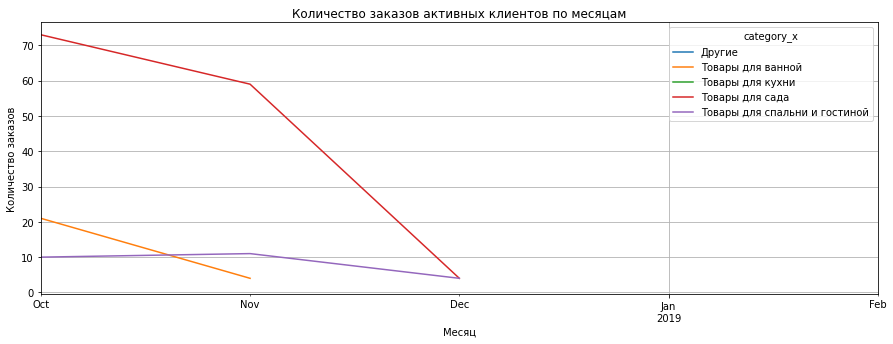

In [56]:
rfm.query('category == "Активные"').pivot_table(         #сводная таблица
    index='month', 
    columns='category_x',  
    values='order_id',  
    aggfunc='count').plot(figsize=(15, 5), grid=True)
plt.title('Количество заказов активных клиентов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

Активные клиенты заказывали только товары для сада, ванной и спальни. К декабрю кол-во заказов свелось к минимуму.

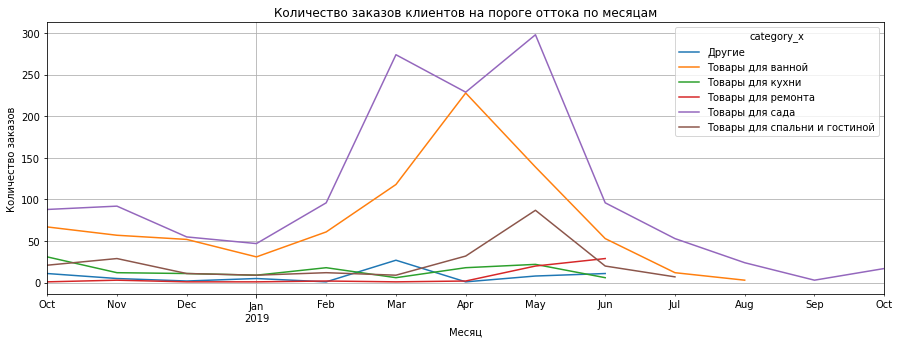

In [57]:
rfm.query('category == "На пороге оттока"').pivot_table(         #сводная таблица
    index='month', 
    columns='category_x',  
    values='order_id',  
    aggfunc='count').plot(figsize=(15, 5), grid=True)
plt.title('Количество заказов клиентов на пороге оттока по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

Пик заказа товаров для сада и для ванной - весна

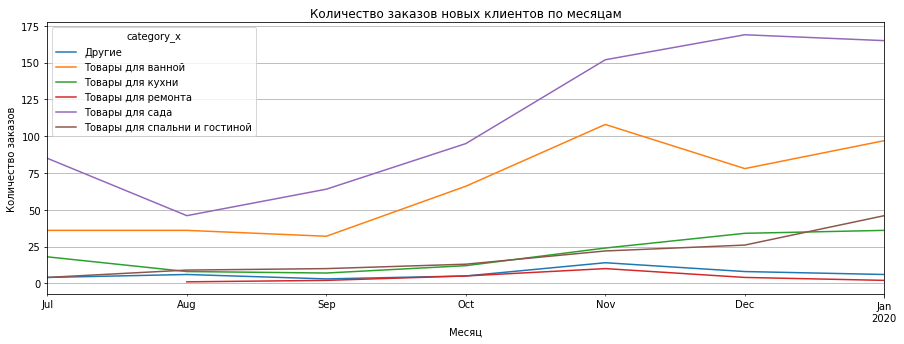

In [58]:
rfm.query('category == "Новые"').pivot_table(         #сводная таблица
    index='month', 
    columns='category_x',  
    values='order_id',  
    aggfunc='count').plot(figsize=(15, 5), grid=True)
plt.title('Количество заказов новых клиентов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

Нет выраженной сезонности, но заказы товаров для сада и для ванной с осени постепенно увеличиваются.

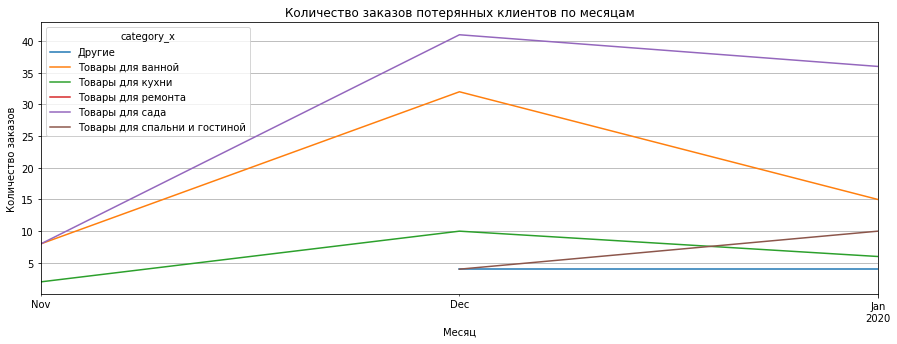

In [59]:
rfm.query('category == "Потерянные"').pivot_table(         #сводная таблица
    index='month', 
    columns='category_x',  
    values='order_id',  
    aggfunc='count').plot(figsize=(15, 5), grid=True)
plt.title('Количество заказов потерянных клиентов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов');

Пик приходится на декабрь в товарах для сада, ванной и кухни

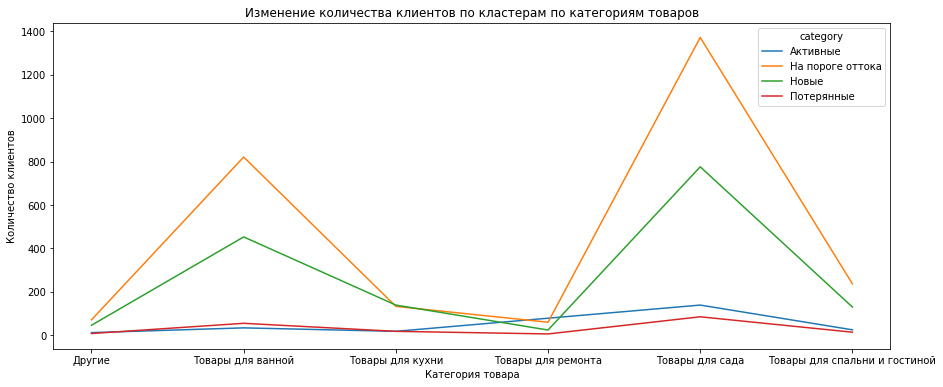

In [60]:
#Считаем количество клиентов в каждом кластере по категориям товаров
cater = rfm.groupby(['category_x', 'category'])['customer_id'].count().reset_index(name='count')

#график
plt.figure(figsize=(15,6))
sns.lineplot(x='category_x', y='count', hue='category', data=cater)

#оси и заголовок
plt.xlabel('Категория товара')
plt.ylabel('Количество клиентов')
plt.title('Изменение количества клиентов по кластерам по категориям товаров')
plt.show()

По всем кластерам больше всего клиентов у категорий товаров для ванной и товаров для сада.\
Но новых и клиентов на пороге оттока в разы больше клиентов в эти двух категориях товаров. Особенно много в них клиентов на пороге оттока.\
Исходя из двух последних графиков, можно сделать вывод, что клиенты на пороге оттока сезонно приобретают товары для сада и для ванной.

**Вывод:**  После кластеризации пользователей было обнаружено, что 3ий сегмент в разрезе давности совершения покупки приносит наибольшую выручку в категории товаров для спальни и гостиной.\
А пользователи из 1го сегмента в разрезе кол-ва покупок в связи с тем, что клиентов, совершающих не более 2 заказов намного больше, приносят в 4 раза больше выручки магазину.\
В разрезе кол-ва потраченных средств, пользователи 4го сегмента приносят наибольшую выручку по всем категориям.
    
Затем сегменты были разделены на 4 категории клиентов: Активные, На пороге оттока, Потерянные и Новые.\
Клиентов на пороге оттока оказалось больше всего, а активных, к сожалению, меньше всего.

## Формулирование и проверка статистических гипотез

In [61]:
#Создадим лист с парами групп, для которых необходимо провести Тест Манна-Уитни
import itertools
test_pairs_list = list(itertools.combinations(['Активные', 'На пороге оттока', 'Потерянные', 'Новые'], 2))
print(test_pairs_list)

[('Активные', 'На пороге оттока'), ('Активные', 'Потерянные'), ('Активные', 'Новые'), ('На пороге оттока', 'Потерянные'), ('На пороге оттока', 'Новые'), ('Потерянные', 'Новые')]


### Гипотеза о различии в количестве товаров в заказе между кластерами

**H0: Различий в количестве товаров в заказе между кластерами нет\
H1: Различия в количестве товаров в заказе между кластерами есть**

Установим уровень значимости в 0.05 и применим поправку Бонферрони, поскольку тест множественный.\
У нас 6 пар категорий, поэтому разделим уровень значимости на количество сравнений. 

In [62]:
# Проходим циклом по списку пар
for pair in test_pairs_list:
    # Получаем данные для групп
    group1 = rfm[rfm['category'] == pair[0]]['quantity']
    group2 = rfm[rfm['category'] == pair[1]]['quantity']
    
    # Сравниваем группы критерием Манна-Уитни
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    # Выводим результаты
    print(pair[0], '-', pair[1], ': statistic={:.2f}, pvalue={:.2f}'.format(stat, p))
    
    # Определяем результаты теста
    alpha = 0.05 / 6
    if p < alpha:
        print('Есть статистически значимые различия')
        print('----------------------------')
    else:
        print('Нет статистически значимых различий')
        print('----------------------------')

Активные - На пороге оттока : statistic=408170.50, pvalue=0.20
Нет статистически значимых различий
----------------------------
Активные - Потерянные : statistic=33549.00, pvalue=0.00
Есть статистически значимые различия
----------------------------
Активные - Новые : statistic=279730.00, pvalue=0.00
Есть статистически значимые различия
----------------------------
На пороге оттока - Потерянные : statistic=418413.00, pvalue=0.00
Есть статистически значимые различия
----------------------------
На пороге оттока - Новые : statistic=3471245.50, pvalue=0.00
Есть статистически значимые различия
----------------------------
Потерянные - Новые : statistic=181565.50, pvalue=0.00
Есть статистически значимые различия
----------------------------


В ходе проверки 6 пар категорий клиентов выявлено, что только у активных и на пороге оттока нет статистически значимых различий в количестве товаров в заказе.\
Остальные категории различаются между собой.

### Гипотеза о различии выручки между кластерами

**H0: Различий в выручке между кластерами нет\
H1: Различий в выручке между кластерами есть**

In [63]:
# Проходим циклом по списку пар
for pair in test_pairs_list:
    # Получаем данные для групп
    group1 = rfm[rfm['category'] == pair[0]]['revenue']
    group2 = rfm[rfm['category'] == pair[1]]['revenue']
    
    # Сравниваем группы критерием Манна-Уитни
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    # Выводим результаты
    print(pair[0], '-', pair[1], ': statistic={:.2f}, pvalue={:.2f}'.format(stat, p))

    # Определяем результаты теста
    alpha = 0.05 / 6
    if p < alpha:
        print('Есть статистически значимые различия')
        print('----------------------------')
    else:
        print('Нет статистически значимых различий')
        print('----------------------------')

Активные - На пороге оттока : statistic=485252.50, pvalue=0.00
Есть статистически значимые различия
----------------------------
Активные - Потерянные : statistic=43087.00, pvalue=0.00
Есть статистически значимые различия
----------------------------
Активные - Новые : statistic=215999.00, pvalue=0.06
Нет статистически значимых различий
----------------------------
На пороге оттока - Потерянные : statistic=469907.50, pvalue=0.00
Есть статистически значимые различия
----------------------------
На пороге оттока - Новые : statistic=2170321.00, pvalue=0.00
Есть статистически значимые различия
----------------------------
Потерянные - Новые : statistic=74053.50, pvalue=0.00
Есть статистически значимые различия
----------------------------


Во всех парах были выявлены статистически значимые различия в выручке между кластерами, что означает, что кластеризация проведена верно.

## Выводы и рекомендации

За период с 1 октября 2018 г. по 31 января 2020 г. было сделано 2 784 заказа. В магазине имеется 2 343 уникальных товара с ценой до 14 917 рублей.

Медиана цены товара составляет 150 руб.\
Чаще всего пользователь совершает 1 заказ, только 5% сделали 2 заказа.\
Медианная выручка с клиента составляет 830 рублей, а медианное количество товаров в заказе - 2.\
Больше всего заказов было сделано в декабре 2018г. и феврале 2019г. - около 280 заказов за месяц. С августа 2020 года наблюдается тенденция к постоянному росту кол-ва заказов.\
В июне выручка достигла пика в 900 тыс. руб. за счет одного дорогого заказа. Без учета этого заказа, ежемесячная выручка уменьшается с каждым месяцем. В октябре 2019г она была в районе 350 тыс. руб, а в начале 2020г. уже около 150 тыс. руб.\
Товары были разделены на 5 категорий: Товары для сада, ванной, кухни, спальни и гостиной, ремонта.\
Больше всего наименований в товарах для сада и товарах для ванной. Именно они приносят магазину больше выручки, чем другие категории - в месяц от 80 до 200 тыс. руб.\
Также товары для сада и товары для ванной приносят больше заказов каждый месяц - до 140, товары других категорий заказывают не больше 40.\
Пик заказов товаров для сада приходится на весну в связи с началом дачного сезона, остальные категории не отличаются сезонностью.\

После сегментации пользователей было обнаружено, что 3ий сегмент в разрезе давности совершения покупки приносит наибольшую выручку в категории товаров для спальни и гостиной.\
А пользователи из 1го сегмента в разрезе кол-ва покупок в связи с тем, что клиентов, совершающих не более 2 заказов намного больше, приносят в 4 раза больше выручки магазину.\
В разрезе кол-ва потраченных средств, пользователи 4го сегмента приносят наибольшую выручку по всем категориям.

Затем сегменты клиентов были разделены на 4 кластера: Активные, На пороге оттока, Потерянные и Новые.\
Клиентов на пороге оттока оказалось больше всего, а активных, к сожалению, меньше всего.
В целом, по всем кластерам больше всего закзазов и клиентов в категории товаров для сада и для ванной.\
Но среди клиентов на пороге оттока наблюдается сезонность - пик товаров для сада и товаров для ванной приходится на весну.

Результаты проверки статистически значимых различий в количестве заказов и выручке между кластерами показали, что практически во всех сравнениях, имеются различия.

### Рекомендации

Кластер "Активные":

Этот кластер представляет наиболее лояльных клиентов, которые покупают сравнительно часто (в среднем раз в месяц) и тратят при этом достаточно (в среднем 820 рублей за покупку).
Клиенты из этого кластера больше приобретают товары для сада, чем другие категории товаров.
- Активным клиентам предлагать товары для сада и проводить рассылки персональных предложений с дополнительными скидками или бонусами для удержания клиентов в этом кластере.
- Также можно предлагать дополнительные продукты или услуги, которые могут быть интересны этой категории клиентов, чтобы повысить средний чек.



Кластер "На пороге оттока":

Этот кластер представляет клиентов, которые покупают реже, чем "Активные" (в среднем раз в 2 месяца) и тратят меньшие суммы (в среднем 800 рублей за покупку).
Поведение этих клиентов носит сезонный характер - пик клиентов приходится на весну, к осени сильно спадает. 
Также этот кластер больше всего покупает товары для сада и товары для ванной.
- В начале весны предлагать клиентам на пороге оттока товары для сада, например, в рассылке или на странице сайта. 
- Им же предлагать дополнительные товары на этапе оформления заказов для увеличения количества продаваемых товаров 


Кластер "Новые":

Этот кластер представляет клиентов, которые недавно совершили покупку (среднем до 3 месяцев назад) со средней выручкой в 900 руб.
Количество новых пользователей растет, они также как и предудыщий кластер, выбирают товары для сада и для ванной.
- Новым пользователям стоит рассылать предложения с товарами для сада и для ванной и новыми продуктами в этих категориях, чтобы привлечь их внимание и повысить вероятность покупки.

Кластер "Потерянные":

Этот кластер представляет клиентов, которые не покупали уже давно (более 6 месяцев) и принесли выручки в среднем 120 руб. и возможно уже ушли к конкурентам.
Потерянные клиенты постепенно увеличиваются, они также ориентированы на товары для сада
- Потерянным клиентам в рекламных предложениях стоит рассылать товары для сада, возможно, сделать выгодные предложения на товары для сада, чтобы вернуть их.

**Презентация:** https://docs.google.com/presentation/d/1vJZCXIu-A2PWRSdspWctcStToW7BwkNp/edit#slide=id.p1\
**Дашборд:** https://public.tableau.com/app/profile/farida.khamzina/viz/Ecommerce_16809976224030/Sheet1 